<a href="https://colab.research.google.com/github/Alexanderdivv/my-libOnPython/blob/intro/Watershed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Watershed 
Reference: https://pyimagesearch.com/2015/11/02/watershed-opencv/


In [1]:
#import necessary library
from __future__ import print_function
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage
import argparse
import imutils
import cv2
import numpy as np


In [ ]:
# contruct(bangun) argument parse and parse the arguments
%%writefile parsing.py
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required=True, help = "Path to input image")
args = vars(ap.parse_args())

# load the image and perform pyramid mean shift filtering
# to aid the thresholding step


Overwriting parsing.py


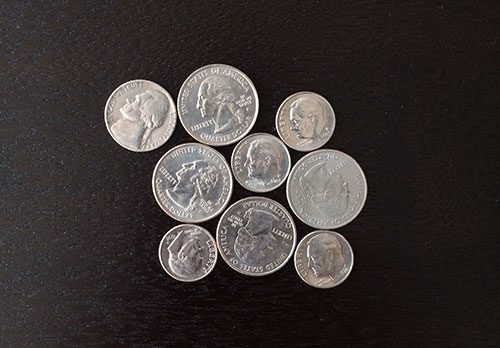

In [ ]:
image = cv2.imread("watershed_coins_01.jpg")
shifted = cv2.pyrMeanShiftFiltering(image, 21, 51)
from google.colab.patches import cv2_imshow

cv2_imshow(image)

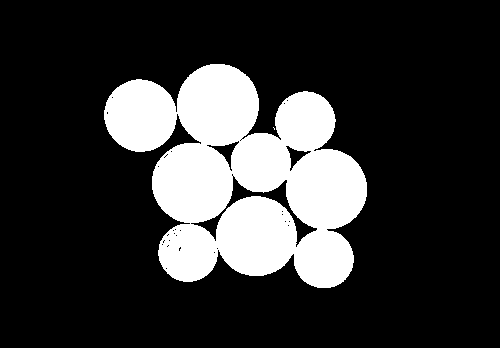

In [ ]:
#convert the mean shift image to greyscale, then apply
#outs;s thresholding
gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
cv2_imshow(thresh)

[INFO] 2 unique contours found


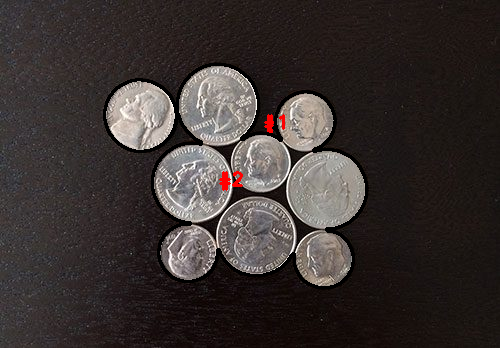

-1

In [ ]:
#find contours in the thresholded image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
print("[INFO] {} unique contours found".format(len(cnts)))

#loop over the contours
for(i,c) in enumerate(cnts):
  ((x, y), _) = cv2.minEnclosingCircle(c)
  cv2.putText(image, "#{}".format(i + 1), (int(x) - 10, int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
  cv2.drawContours(image, [c], -1, (0.255,0), 2)

#show the output image
cv2_imshow(image)
cv2.waitKey(0)



---

## Watershed Code start here

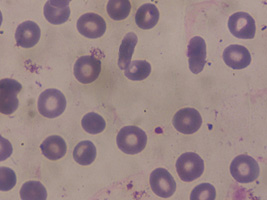

In [3]:
image = cv2.imread("source.jpg")
shifted = cv2.pyrMeanShiftFiltering(image, 21, 51)
from google.colab.patches import cv2_imshow

cv2_imshow(image)

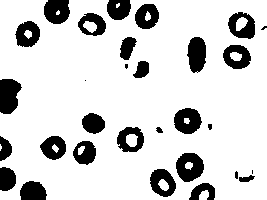

In [4]:
# convert the mean shift image to grayscale, then apply
# Otsu's thresholding
gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
cv2_imshow(thresh)

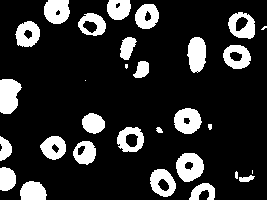

In [5]:
#invert
thresh = cv2.bitwise_not(thresh)
cv2_imshow(thresh)

In [10]:

#compute the exactr Euclidean distance from every binary pixel
#to the nearst zero pixel, then find peaks in this distance map
D = ndimage.distance_transform_edt(thresh)
localMax = peak_local_max(D, indices=False, min_distance = 20, labels = thresh)

#perform a connected component analysis on the local peaks, using 8-connectivity,
#then apply the watershed algorithm
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-D, markers, mask=thresh)
print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))

[INFO] 19 unique segments found


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  """
/usr/local/lib/python3.7/dist-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


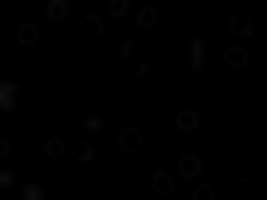

In [11]:
cv2_imshow(D
           )

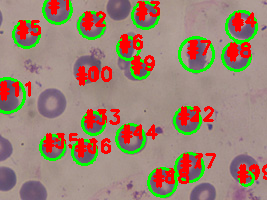

-1

In [13]:
#loop over the unique labeles returned by the watershed alhoritm
for label in np.unique(labels):
  #if the label is zero, we are exxamining the "background" so simply ignore it
  if label == 0:
    continue
  
  #otherwise, allocate memory for the label refgion and draw it onthe mask
  mask = np.zeros(gray.shape, dtype="uint8")
  mask[labels == label] = 255

  # detect contours int the mask and grab the largest one
  cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cnts = imutils.grab_contours(cnts)
  c = max(cnts, key=cv2.contourArea)

  #draw a circle enclosing the object
  ((x, y), r) = cv2.minEnclosingCircle(c)
  cv2.circle(image, (int(x), int(y)), int(r), (0,255,0), 2)
  cv2.putText(image, "#{}".format(label), (int(x) - 10, int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,255), 2)

#SHOW THE OUTPUT image
cv2_imshow(image)
cv2.waitKey(0)


In [ ]:
#apply watershed to another image

# Watershed
source: https://github.com/bnsreenu/python_for_microscopists/blob/39295b136bc02b829babad9bb4dcb81eb6d9a22e/035-Cell%20Nuclei%20analysis%20using%20watershed.py

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage
from skimage import measure, color, io

img = cv2.imread("souce.jpg")

cell=img[:,:,0]
pixels_to_um = 0.454
pixels_